# Tutorial for Mean Shift algorithm

#  Description

Mean shift algorithm is one of many clustering algorithms available. This algorithm creates a cluster by assigning the datapoints to clusters by moving the points towards the mode. Mode is simply put the highest density region speaking in terms of this algorithm. Since it mostly depends on this factor therefore the name.
The applications of ths algorithm mostly occur in the field of image processing.

#  K-Means Vs Mean Shift algorithm

The main advantage of Mean shift algorithm is that it does not require the number of clusters to be specified beforehand. The number of clusters is determined by the data dynamically. In some cases it is not efficient to guess the right number of clusters ti use. In K-Means, the output may end up having too few clusters or too many clusters to be useful. At the cost of larger time complexity, Meanshift determines the number of clusters suitable to the dataset provided.

# Kernel Density Estimation

To apply mean shift represent the data in a mathematical manner. Mean shift depends on Kernel Density Estimation. For example, if a data is sampled from a probability distribution KDE is probablity density function for that data. 
To apply KDE, We place a kernel which is nothing but a weighing function in mathematical notion on each point in the dataset. The most weighing function we use is Gaussian.
Mean shifts uses this estimation by imagining all the points climbed up hill on to the nearest peak represented by the KDE Surface. The formation of the clusters finally depends on the bandwidth we use. If we have a small bandwidth, resultant KDE surface will have a peak for each point. This will result in many clusters. If we have a bigger bandwidth, the formation of clusters will be smoother and there will be less number of clusters. This can be shown in the below representations.

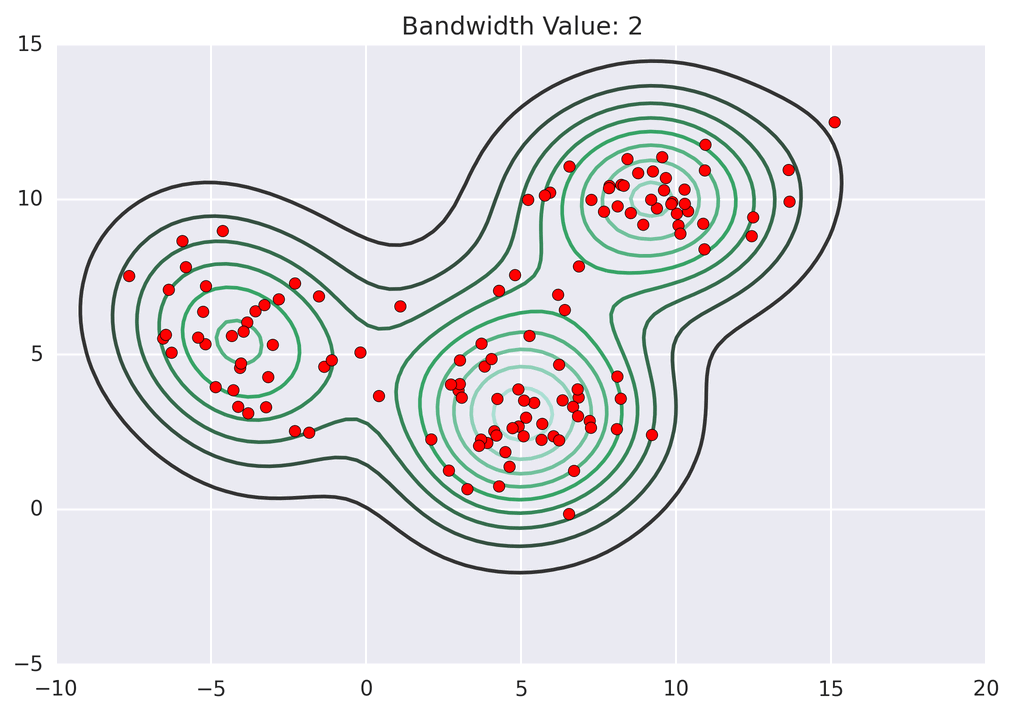

In [1]:
from PIL import Image
image = Image.open('ms_2d_bw_2.gif')
image


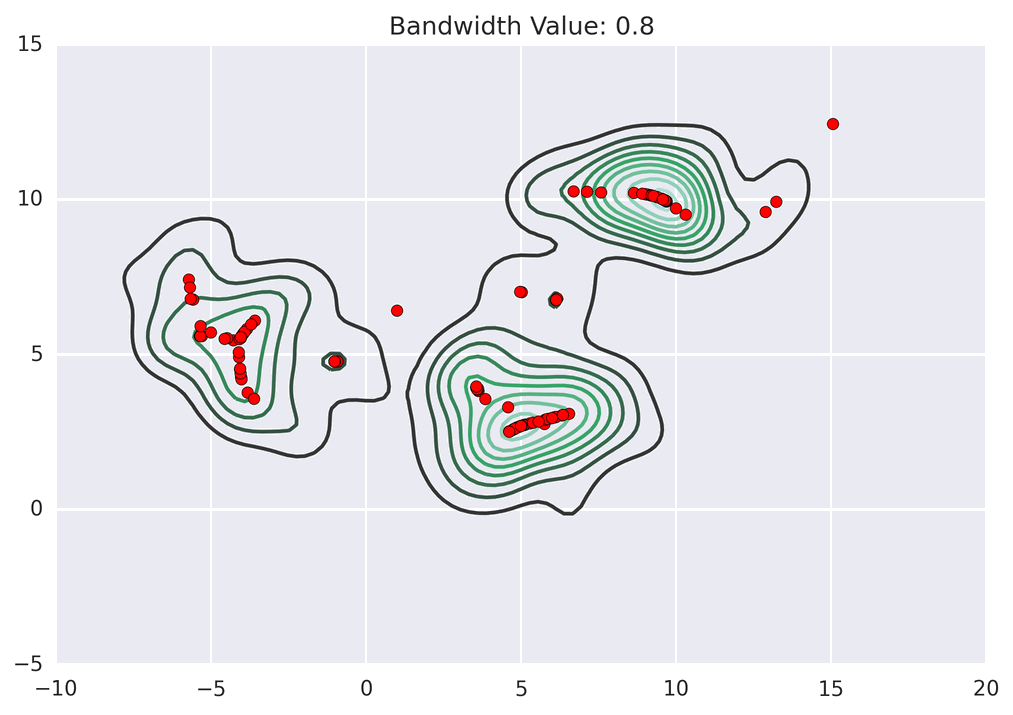

In [2]:
image2 = Image.open('ms_2d_bw_.8-9 (dragged).tiff')
image2

When used a bigger badwidth, the first clustering results in three KDE surface peaks thereby forming three clusters. The second image which shows the usage of smaller bandwidth, results in the formation of many clusters. The main advantage of the mean shift algorithm is the ability to use different bandwidths depending on the applications. 

# Pros

1. The number of clusters to be known beforehand is not mandatory.
2. We only use bandwidth. These help in formation of clusters based on our application.

# Cons

1. Expensive and slower than K-means algorithm
2. Since it only depends on bandwidth, small bandwidth gives slow convergence and large bandwidth results in missing some clusters.

# Application

Meanshift is used as an image segmentation algorithm. The working demo of this algorithm is as shown below

In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 16, 12

We will load in the image and display the original image for reference.

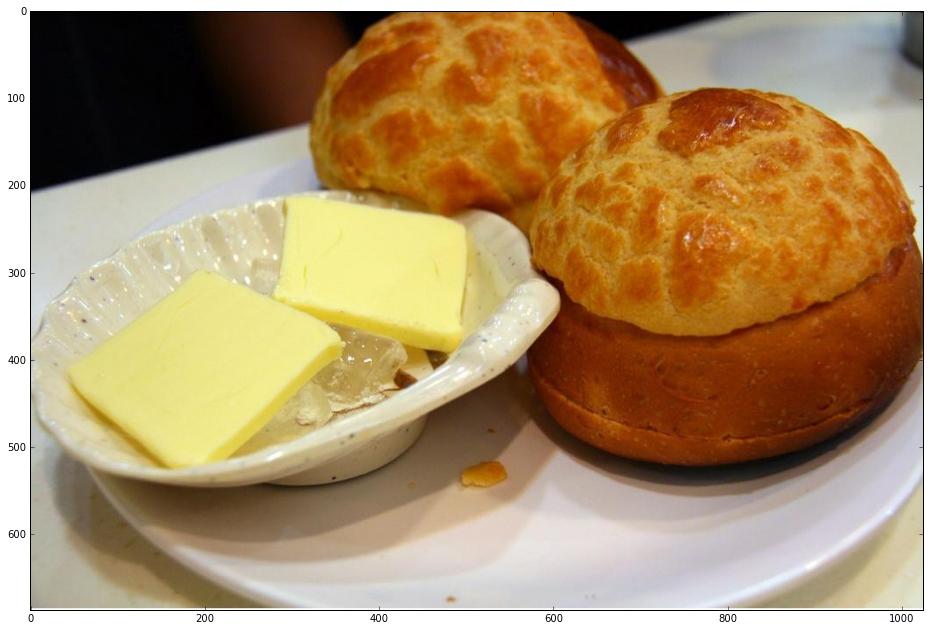

In [2]:
image = Image.open('bread.jpg')

# Image is (687 x 1025, RGB channels)
image = np.array(image)
original_shape = image.shape

# Flatten image.
X = np.reshape(image, [-1, 3])

plt.imshow(image)

Estimate the kernel bandwidth to use from our image (the datapoints).

In [3]:
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)
print(bandwidth)

35.6554347338


Now run Meanshift on the image to do the image segmentation, which is stored in *X*.

In [4]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=35.655434733769191, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

Print some debug information to get a sense of what is being done. From what we see, this yielded 6 clusters, thus 6 colors. If you re-run this notebook with different parameters, you may find different results.

In [5]:
labels = ms.labels_
print(labels.shape)
cluster_centers = ms.cluster_centers_
print(cluster_centers.shape)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

(704175,)
(6, 3)
number of estimated clusters : 6


In [6]:
segmented_image = np.reshape(labels, original_shape[:2])  # Just take size, ignore RGB channels.

Now, let's display the segmented image and the original image.

(-0.5, 1024.5, 686.5, -0.5)

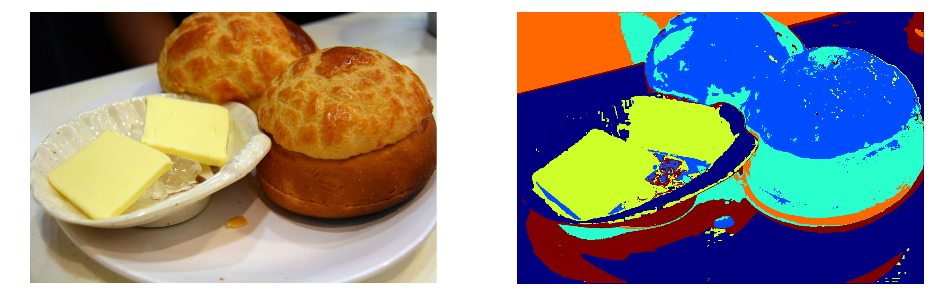

In [8]:
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.axis('off')

# References

http://http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/

www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/

http://efavdb.com/mean-shift/

https://spin.atomicobject.com/2015/05/26/mean-shift-clustering/

https://github.com/pksohn/tweet-clustering